In [1]:
import pandas as pd
%pylab inline

df=pd.read_csv("abalone_data.csv") 


Populating the interactive namespace from numpy and matplotlib


In [2]:
df.corr()

,lenght,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
lenght,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


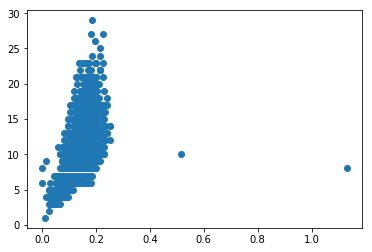

In [3]:
x=df['lenght'].values
y=df['rings'].values
z=df['height'].values
k=df['shucked_weight'].values
plt.plot(z,y, 'o')


In [4]:
def MahalanobisDist(x, y):
    covariance_xy = np.cov(x,y, rowvar=0)
    inv_covariance_xy = np.linalg.inv(covariance_xy)
    xy_mean = np.mean(x),np.mean(y)
    x_diff = np.array([x_i - xy_mean[0] for x_i in x])
    y_diff = np.array([y_i - xy_mean[1] for y_i in y])
    diff_xy = np.transpose([x_diff, y_diff])
    
    md = []
    for i in range(len(diff_xy)):
        md.append(np.sqrt(np.dot(np.dot(np.transpose(diff_xy[i]),inv_covariance_xy),diff_xy[i])))
    return md


In [5]:
from scipy.stats import chi2
def MD_removeOutliers_better(x, y, threshold=0.01):
    MD = MahalanobisDist(x, y)
    prob_larger = 1 - chi2.cdf(MahalanobisDist(x,y), 2) 
    nx, ny, outliers = [], [], []
    for i in range(len(MD)):
        if prob_larger[i] > threshold: 
            nx.append(x[i])
            ny.append(y[i])
        else:
            outliers.append(i) 
    return (np.array(nx), np.array(ny), np.array(outliers))




In [6]:
xok, yok, outliers = MD_removeOutliers_better(x,y,0.1)

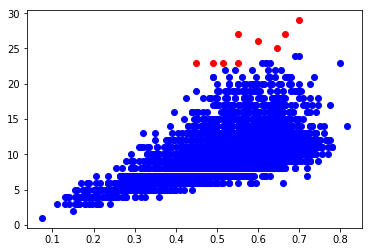

In [7]:
plot(xok,yok,'bo')
if outliers.any():
    plot(x[outliers], y[outliers],'ro')



In [8]:
len(x[outliers])

9

In [9]:
xok, zok, outliers = MD_removeOutliers_better(x,z,0.1)

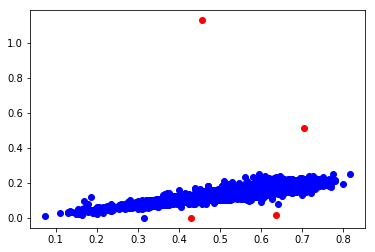

In [10]:
plot(xok,zok,'bo')
if outliers.any():
    plot(x[outliers], z[outliers],'ro')



In [11]:
len(x[outliers])

4

29

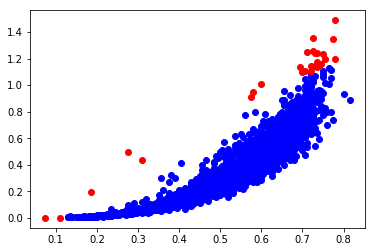

In [12]:
xok, kok, outliers = MD_removeOutliers_better(x,k,0.1)

plot(xok,kok,'bo')
if outliers.any():
    plot(x[outliers], k[outliers],'ro')



len(x[outliers])

11

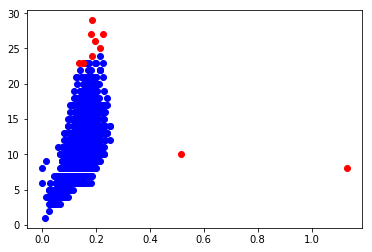

In [13]:
zok, yok, outliers = MD_removeOutliers_better(z,y,0.1)

plot(zok,yok,'bo')
if outliers.any():
    plot(z[outliers], y[outliers],'ro')



len(z[outliers])

11

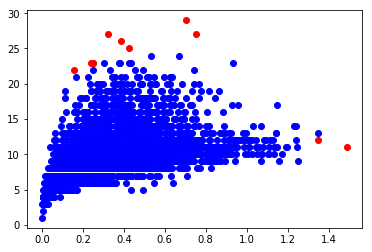

In [14]:
kok, yok, outliers = MD_removeOutliers_better(k,y,0.1)

plot(kok,yok,'bo')
if outliers.any():
    plot(k[outliers], y[outliers],'ro')



len(k[outliers])

8

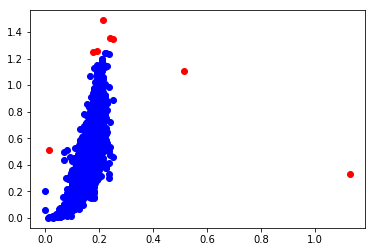

In [15]:
zok, kok, outliers = MD_removeOutliers_better(z,k,0.1)

plot(zok,kok,'bo')
if outliers.any():
    plot(z[outliers], k[outliers],'ro')



len(z[outliers])